In [1]:
import snowflake.connector
import pandas as pd
from sqlalchemy import create_engine
# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password= 'EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
)


/Users/jackson/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
cur = conn.cursor()

# Query to count unique flights
query = """
SELECT COUNT(DISTINCT CONCAT(SCHD_LEG_DEP_AIRPRT_IATA_CD, '_', 
                             SCHD_LEG_DEP_LCL_TMS, '_', 
                             SCHD_LEG_ARVL_LCL_TMS)) AS total_flights
FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
"""

# Execute query
cur.execute(query)
result = cur.fetchone()

# Print the total flights count
print(f"Total Unique Flights: {result[0]}")

Total Unique Flights: 246201


In [5]:
# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# Query to find the oldest and latest date
query = """
SELECT 
    MIN(SCHD_LEG_DEP_LCL_DT) AS oldest_date, 
    MAX(SCHD_LEG_DEP_LCL_DT) AS latest_date
FROM BAGROOM_ARRIVAL
"""

# Execute query
cur.execute(query)
result = cur.fetchone()

# Print results
print(f"Oldest Date: {result[0]}")
print(f"Latest Date: {result[1]}")

Oldest Date: 2024-01-01
Latest Date: 2024-12-31


   FLIGHT_MONTH  TOTAL_FLIGHTS
0       2024-01          19827
1       2024-02          19365
2       2024-03          21433
3       2024-04          20271
4       2024-05          20882
5       2024-06          21144
6       2024-07          21862
7       2024-08          20614
8       2024-09          19296
9       2024-10          21342
10      2024-11          19866
11      2024-12          20299


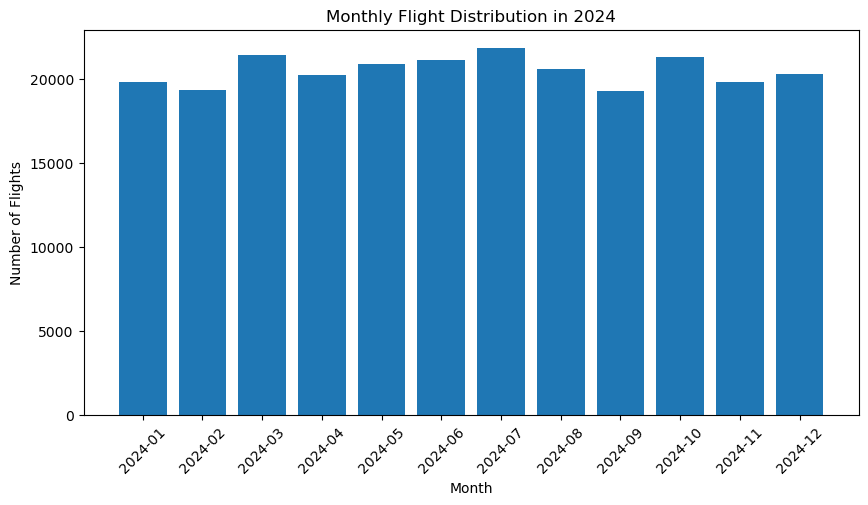

In [9]:
import matplotlib.pyplot as plt

query = """
SELECT 
    LEFT(SCHD_LEG_DEP_LCL_DT, 7) AS flight_month,  -- Extract 'YYYY-MM' from date
    COUNT(DISTINCT CONCAT(SCHD_LEG_DEP_AIRPRT_IATA_CD, '_', 
                          SCHD_LEG_DEP_LCL_TMS, '_', 
                          SCHD_LEG_ARVL_LCL_TMS)) AS total_flights
FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
WHERE SCHD_LEG_DEP_LCL_DT >= '2024-01-01' AND SCHD_LEG_DEP_LCL_DT < '2025-01-01'
GROUP BY flight_month
ORDER BY flight_month;

"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print results
print(df)

# Plot flight distribution
plt.figure(figsize=(10,5))
plt.bar(df['FLIGHT_MONTH'], df['TOTAL_FLIGHTS'])
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Monthly Flight Distribution in 2024')
plt.xticks(rotation=45)
plt.show()

      TIME_BIN  BAG_COUNT
0  105-120 min    5270150
1  120-135 min    4049578
2    30-45 min    2117364
3    45-60 min    3756829
4    60-75 min    5826705
5    75-90 min    6612885
6   90-105 min    6294194


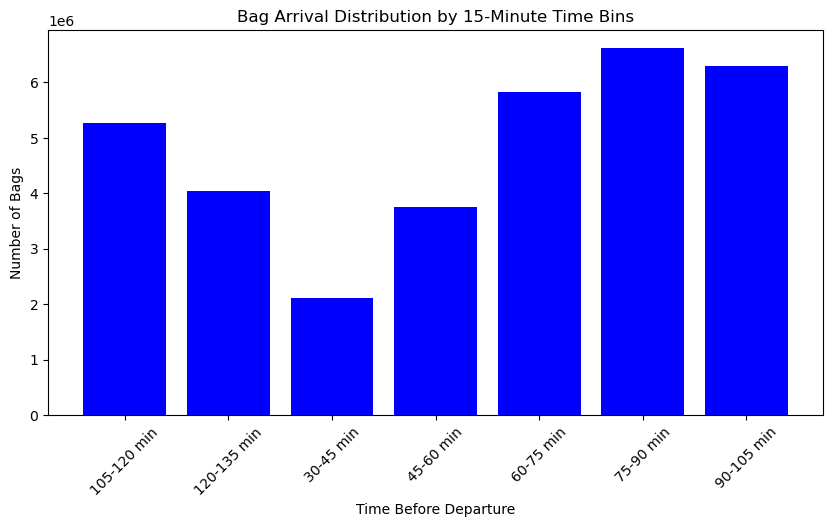

In [10]:


# Query to get bag count per time bin
query = """
SELECT 
    CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 30 AND 45 THEN '30-45 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 45 AND 60 THEN '45-60 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 60 AND 75 THEN '60-75 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 75 AND 90 THEN '75-90 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 90 AND 105 THEN '90-105 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 105 AND 120 THEN '105-120 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 120 AND 135 THEN '120-135 min'
    END AS time_bin,
    COUNT(*) AS bag_count
FROM BAGROOM_ARRIVAL
WHERE TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 30 AND 135
GROUP BY time_bin
ORDER BY time_bin;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print results
print(df)

# Plot distribution
plt.figure(figsize=(10, 5))
plt.bar(df['TIME_BIN'], df['BAG_COUNT'], color='blue')
plt.xlabel('Time Before Departure')
plt.ylabel('Number of Bags')
plt.title('Bag Arrival Distribution by 15-Minute Time Bins')
plt.xticks(rotation=45)
plt.show()



In [11]:

conn.close()

In [3]:
df

,OPERAT_AIRLN_IATA_CD,SCHD_LEG_DEP_AIRPRT_IATA_CD,OPERAT_FLIGHT_NBR,SCHD_LEG_DEP_LCL_DT,SCHD_LEG_ARVL_AIRPRT_IATA_CD,SCHD_LEG_DEP_LCL_TMS,SCHD_LEG_DEP_GMT_TMS,SCHD_LEG_DEP_GMT_DT,SCHD_LEG_ARVL_LCL_TMS,SCHD_LEG_ARVL_LCL_DT,...,AVL_STA_MIRS_PRIORITY_CD,AVL_STA_MIRS_PRIORITY_REGION_DESC,INTERNATIONAL,BANK_ID,MKT_DAY_FREQUENCY,MKT_WEEK_FREQUENCY,MKT_DAY_DEP_SEQ,BAG_SCAN_UTC_TMS,BAG_SCAN_LCL_TMS,SF_LOAD_TMS
0,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:00,2024-05-15 18:34:00,2025-01-09 16:59:25.688
1,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:33:27,2024-05-15 18:33:27,2025-01-09 16:59:25.688
2,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:55,2024-05-15 18:34:55,2025-01-09 16:59:25.688
3,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:35:04,2024-05-15 18:35:04,2025-01-09 16:59:25.688
4,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:36:17,2024-05-15 18:36:17,2025-01-09 16:59:25.688
5,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:36:48,2024-05-15 18:36:48,2025-01-09 16:59:25.688
6,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:37:44,2024-05-15 18:37:44,2025-01-09 16:59:25.688
7,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:42:01,2024-05-15 18:42:01,2025-01-09 16:59:25.688
8,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:43:25,2024-05-15 18:43:25,2025-01-09 16:59:25.688
9,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:43:51,2024-05-15 18:43:51,2025-01-09 16:59:25.688


In [5]:
cur = conn.cursor()

# Query to find baggage scans later than departure
query = """
SELECT * 
FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
WHERE BAG_SCAN_LCL_TMS > SCHD_LEG_DEP_LCL_TMS;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

print(df)

        OPERAT_AIRLN_IATA_CD SCHD_LEG_DEP_AIRPRT_IATA_CD OPERAT_FLIGHT_NBR  \
0                         AA                         DFW              2006   
1                         AA                         DFW              2006   
2                         AA                         DFW              2006   
3                         AA                         DFW              2006   
4                         AA                         DFW              2006   
...                      ...                         ...               ...   
1227176                   AA                         DFW              2513   
1227177                   AA                         DFW              2513   
1227178                   AA                         DFW              2513   
1227179                   AA                         DFW              2513   
1227180                   AA                         DFW              2513   

        SCHD_LEG_DEP_LCL_DT SCHD_LEG_ARVL_AIRPRT_IATA_CD SCHD_L

   OPERAT_FLIGHT_NBR SCHD_LEG_DEP_LCL_TMS  TOTAL_BAGS  EARLY_BAGS  \
0               2759  2024-01-17 08:40:00         160          59   
1               0630  2024-09-17 18:50:00          51          18   
2               2101  2024-12-10 11:05:00          40          12   
3               1984  2024-10-18 22:30:00          93          26   
4               2776  2024-04-12 10:10:00         177          47   
..               ...                  ...         ...         ...   
95              2375  2024-02-28 10:04:00          58           0   
96              2123  2024-08-24 16:55:00          65           0   
97              2368  2024-12-29 18:30:00         183           0   
98              1934  2024-01-04 11:25:00          12           0   
99              0556  2024-12-29 20:15:00          76           0   

   PROPORTION_EARLY_SCANNED  
0                  0.368750  
1                  0.352941  
2                  0.300000  
3                  0.279570  
4                  0.

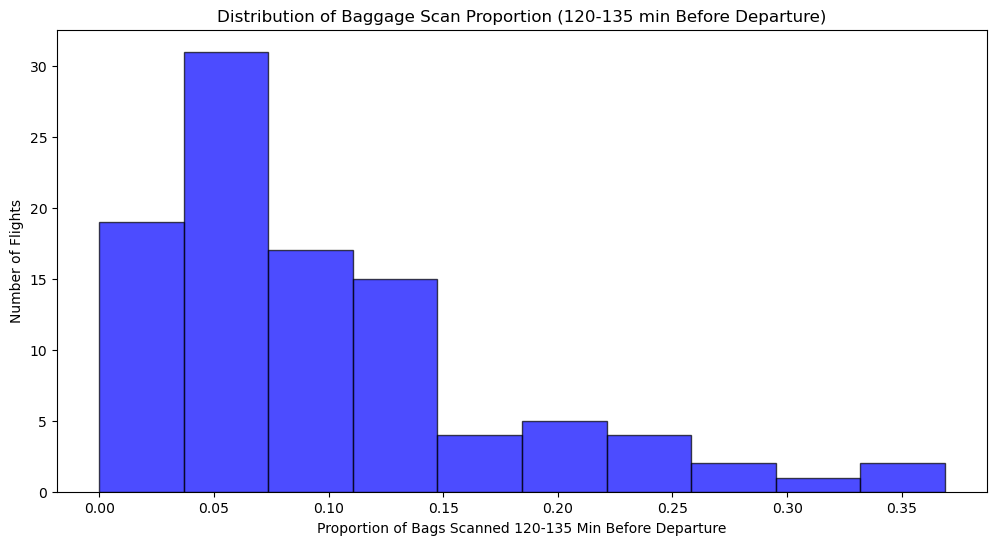

In [15]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# SQL Query to extract 100 unique flights and calculate baggage scan proportions
query = """
WITH UniqueFlights AS (
    SELECT DISTINCT OPERAT_FLIGHT_NBR, SCHD_LEG_DEP_LCL_TMS
    FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
    LIMIT 100
)
SELECT 
    UF.OPERAT_FLIGHT_NBR, 
    UF.SCHD_LEG_DEP_LCL_TMS,
    COUNT(BA.BAG_SCAN_LCL_TMS) AS total_bags,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) BETWEEN 120 AND 135
        THEN 1 ELSE 0 
    END) AS early_bags,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) BETWEEN 120 AND 135
        THEN 1 ELSE 0 
    END) / COUNT(BA.BAG_SCAN_LCL_TMS) AS proportion_early_scanned
FROM UniqueFlights UF
JOIN LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL BA
    ON UF.OPERAT_FLIGHT_NBR = BA.OPERAT_FLIGHT_NBR
    AND UF.SCHD_LEG_DEP_LCL_TMS = BA.SCHD_LEG_DEP_LCL_TMS
GROUP BY UF.OPERAT_FLIGHT_NBR, UF.SCHD_LEG_DEP_LCL_TMS
ORDER BY proportion_early_scanned DESC;


"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df)

# Plot the proportion distribution
plt.figure(figsize=(12, 6))
plt.hist(df['PROPORTION_EARLY_SCANNED'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Proportion of Bags Scanned 120-135 Min Before Departure')
plt.ylabel('Number of Flights')
plt.title('Distribution of Baggage Scan Proportion (120-135 min Before Departure)')
plt.show()

# Close the connection
cur.close()
conn.close()


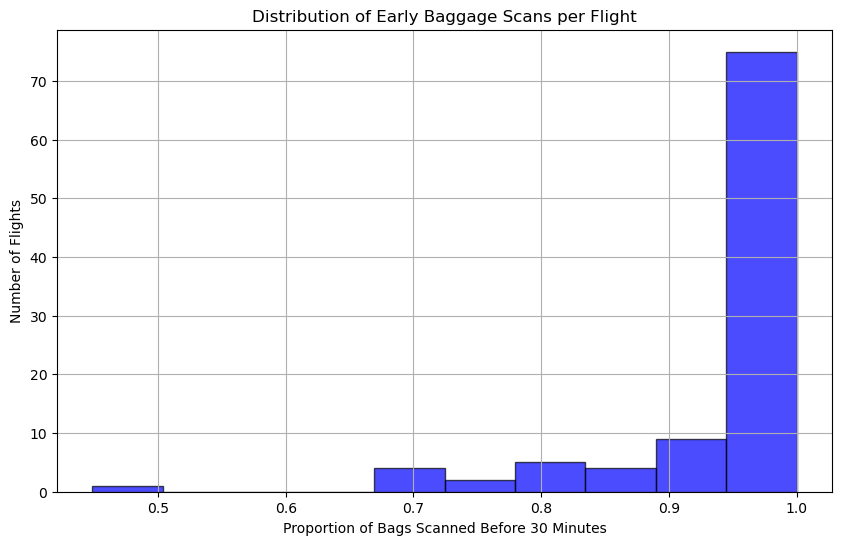

In [17]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# SQL Query
query = """
WITH UniqueFlights AS (
    SELECT DISTINCT OPERAT_FLIGHT_NBR, SCHD_LEG_DEP_LCL_TMS
    FROM BAGROOM_ARRIVAL
    LIMIT 100
)
SELECT 
    UF.OPERAT_FLIGHT_NBR, 
    UF.SCHD_LEG_DEP_LCL_TMS,
    COUNT(BA.BAG_SCAN_LCL_TMS) AS total_bags,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) >= 30 
        THEN 1 ELSE 0 
    END) AS bags_scanned_before_30_min,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) >= 30 
        THEN 1 ELSE 0 
    END) / COUNT(BA.BAG_SCAN_LCL_TMS) AS proportion_scanned_before_30_min
FROM UniqueFlights UF
JOIN BAGROOM_ARRIVAL BA
    ON UF.OPERAT_FLIGHT_NBR = BA.OPERAT_FLIGHT_NBR
    AND UF.SCHD_LEG_DEP_LCL_TMS = BA.SCHD_LEG_DEP_LCL_TMS
GROUP BY UF.OPERAT_FLIGHT_NBR, UF.SCHD_LEG_DEP_LCL_TMS
ORDER BY proportion_scanned_before_30_min DESC;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Ensure correct column formatting
df.columns = df.columns.str.upper()
df['PROPORTION_SCANNED_BEFORE_30_MIN'] = df['PROPORTION_SCANNED_BEFORE_30_MIN'].astype(float)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['PROPORTION_SCANNED_BEFORE_30_MIN'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Proportion of Bags Scanned Before 30 Minutes')
plt.ylabel('Number of Flights')
plt.title('Distribution of Early Baggage Scans per Flight')
plt.grid(True)
plt.show()

# Close connection
cur.close()
conn.close()


In [9]:
import snowflake.connector

conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)
query = """
SELECT *
FROM BAGROOM_ARRIVAL
WHERE OPERAT_FLIGHT_NBR = '0078'
  AND SCHD_LEG_DEP_LCL_TMS = '2024-05-15 22:59:00';
"""

cur = conn.cursor()
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
cur.close()
conn.close()


In [11]:
data
df = pd.DataFrame(data, columns=columns)

In [12]:
df

,OPERAT_AIRLN_IATA_CD,SCHD_LEG_DEP_AIRPRT_IATA_CD,OPERAT_FLIGHT_NBR,SCHD_LEG_DEP_LCL_DT,SCHD_LEG_ARVL_AIRPRT_IATA_CD,SCHD_LEG_DEP_LCL_TMS,SCHD_LEG_DEP_GMT_TMS,SCHD_LEG_DEP_GMT_DT,SCHD_LEG_ARVL_LCL_TMS,SCHD_LEG_ARVL_LCL_DT,...,AVL_STA_MIRS_PRIORITY_CD,AVL_STA_MIRS_PRIORITY_REGION_DESC,INTERNATIONAL,BANK_ID,MKT_DAY_FREQUENCY,MKT_WEEK_FREQUENCY,MKT_DAY_DEP_SEQ,BAG_SCAN_UTC_TMS,BAG_SCAN_LCL_TMS,SF_LOAD_TMS
0,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:00,2024-05-15 18:34:00,2025-01-09 16:59:25.688
1,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:33:27,2024-05-15 18:33:27,2025-01-09 16:59:25.688
2,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:55,2024-05-15 18:34:55,2025-01-09 16:59:25.688
3,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:35:04,2024-05-15 18:35:04,2025-01-09 16:59:25.688
4,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:36:17,2024-05-15 18:36:17,2025-01-09 16:59:25.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:10:05,2024-05-15 18:10:05,2025-01-09 16:59:25.688
1178,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:09:47,2024-05-15 18:09:47,2025-01-09 16:59:25.688
1179,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:10:48,2024-05-15 18:10:48,2025-01-09 16:59:25.688
1180,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:13:23,2024-05-15 18:13:23,2025-01-09 16:59:25.688


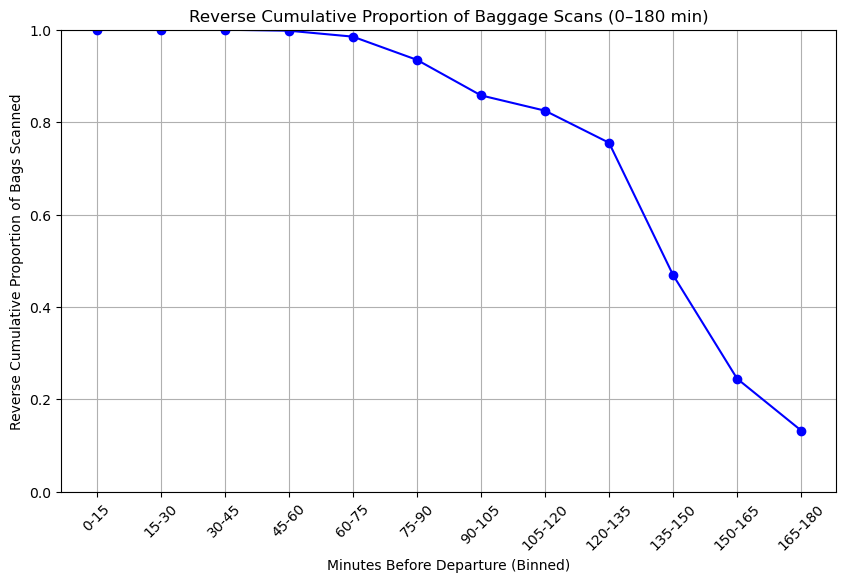

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert times to datetime if not already
df['BAG_SCAN_LCL_TMS'] = pd.to_datetime(df['BAG_SCAN_LCL_TMS'])
df['SCHD_LEG_DEP_LCL_TMS'] = pd.to_datetime(df['SCHD_LEG_DEP_LCL_TMS'])

# Calculate how many minutes before departure each bag was scanned
df['MINUTES_BEFORE_DEPARTURE'] = (
    df['SCHD_LEG_DEP_LCL_TMS'] - df['BAG_SCAN_LCL_TMS']
).dt.total_seconds() / 60

df_filtered = df[(df['MINUTES_BEFORE_DEPARTURE'] >= 0) & 
                 (df['MINUTES_BEFORE_DEPARTURE'] <= 180)].copy()

# Create bins: 0-15, 15-30, ..., 165-180
bins = np.arange(0, 181, 15)  # [0, 15, 30, 45, ..., 180]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_filtered['TIME_BIN'] = pd.cut(
    df_filtered['MINUTES_BEFORE_DEPARTURE'],
    bins=bins,
    labels=labels,
    right=False  # so that 15 goes into bin 15-30, not 0-15
)
bin_counts = df_filtered['TIME_BIN'].value_counts().sort_index()
total_bags = bin_counts.sum()
reverse_cumulative_counts = bin_counts[::-1].cumsum()[::-1]
reverse_cumulative_proportions = reverse_cumulative_counts / total_bags
reverse_cumulative_df = pd.DataFrame({
    'TIME_BIN': bin_counts.index,  # e.g. ['0-15','15-30', ...]
    'BIN_COUNT': bin_counts.values,
    'REVERSE_CUMULATIVE_COUNT': reverse_cumulative_counts.values,
    'REVERSE_CUMULATIVE_PROPORTION': reverse_cumulative_proportions.values
})
plt.figure(figsize=(10, 6))
plt.plot(
    reverse_cumulative_df['TIME_BIN'],
    reverse_cumulative_df['REVERSE_CUMULATIVE_PROPORTION'],
    marker='o', linestyle='-', color='blue'
)
plt.xlabel('Minutes Before Departure (Binned)')
plt.ylabel('Reverse Cumulative Proportion of Bags Scanned')
plt.title('Reverse Cumulative Proportion of Baggage Scans (0–180 min)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


   TIME_BIN  BAG_COUNT  PROPORTION
0      0-15          0    0.000000
1     15-30          0    0.000000
2     30-45          2    0.002137
3     45-60         12    0.012821
4     60-75         47    0.050214
5     75-90         72    0.076923
6    90-105         31    0.033120
7   105-120         65    0.069444
8   120-135        268    0.286325
9   135-150        210    0.224359
10  150-165        105    0.112179
11  165-180        124    0.132479


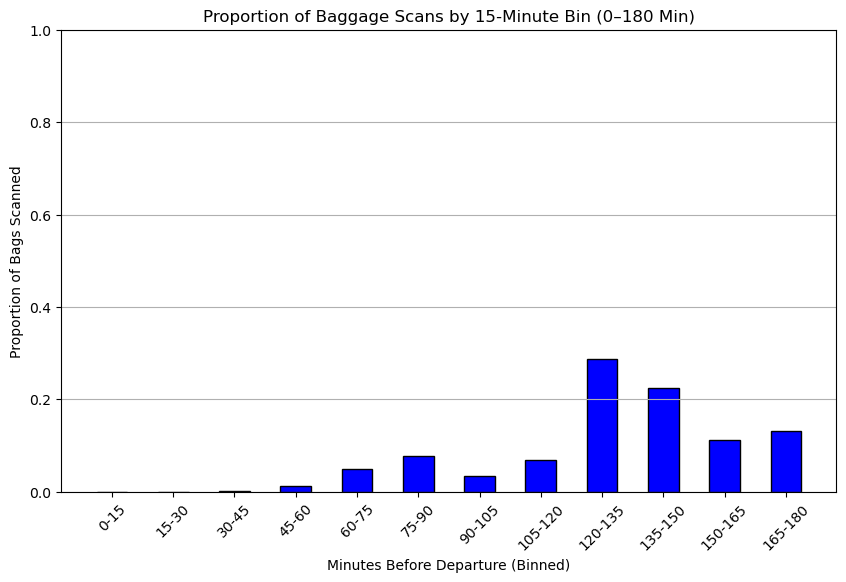

In [24]:
bin_proportions = bin_counts / total_bags

# 5. Create a summary DataFrame (optional)
proportions_df = pd.DataFrame({
    'TIME_BIN': bin_counts.index,
    'BAG_COUNT': bin_counts.values,
    'PROPORTION': bin_proportions.values
})

print(proportions_df)


plt.figure(figsize=(10, 6))
plt.bar(bin_counts.index, bin_proportions, width=0.5, color='blue', edgecolor='black')
plt.xlabel('Minutes Before Departure (Binned)')
plt.ylabel('Proportion of Bags Scanned')
plt.title('Proportion of Baggage Scans by 15-Minute Bin (0–180 Min)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
total = len(df)


In [22]:
reverse_cumulative_df

,TIME_BIN,BIN_COUNT,REVERSE_CUMULATIVE_COUNT,REVERSE_CUMULATIVE_PROPORTION
0,0-15,0,936,1.000000
1,15-30,0,936,1.000000
2,30-45,2,936,1.000000
3,45-60,12,934,0.997863
4,60-75,47,922,0.985043
5,75-90,72,875,0.934829
6,90-105,31,803,0.857906
7,105-120,65,772,0.824786
8,120-135,268,707,0.755342
9,135-150,210,439,0.469017


TIME_BIN
0-15         0
15-30        0
30-45        2
45-60       14
60-75       61
75-90      133
90-105     164
105-120    229
120-135    497
135-150    707
150-165    812
165-180    936
Name: count, dtype: int64